In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
pd1 = df[df["amount"]<2.5].index

In [6]:
df.drop(pd1,inplace=True)

In [7]:
import datetime

In [8]:
#changing the time from object to date time
pd.to_datetime(df["date_time_of_pickup"])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 49990, dtype: datetime64[ns, UTC]

In [9]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])-datetime.timedelta(hours=4)

In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
df["date_time_of_pickup"].dt.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: date_time_of_pickup, Length: 49990, dtype: int64

In [13]:
df["Year"]=df["date_time_of_pickup"].dt.year
df["Month"]=df["date_time_of_pickup"].dt. month
df["Day"]=df["date_time_of_pickup"].dt.day
df["Hours"]=df["date_time_of_pickup"].dt.hour
df["Minutes"]=df["date_time_of_pickup"].dt.minute



In [14]:
df.drop(["date_time_of_pickup","unique_id"],axis=1,inplace=True)

In [15]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51


In [16]:
#it describes all the percentages
df.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
Year,49990.0,2011.738288,1.862639,2008.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
Month,49990.0,6.278036,3.462070,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,6.000000,9.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Day,49990.0,15.689198,8.660521,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,8.000000,13.000000,16.000000,23.000000,28.000000,29.000000,30.000000,30.000000,31.000000,31.000000
Hours,49990.0,12.037748,5.848949,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,7.000000,10.000000,12.000000,17.000000,20.000000,21.000000,21.000000,22.000000,23.000000,23.000000


In [17]:
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

In [18]:
#euclidean distance
df["Distance"] = np.sqrt((np.square(df["X1"]-df["X2"]))+(np.square(df["Y1"]-df["Y2"])))


In [19]:
df.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [61]:
low,upp=remove_outlier(df['amount'])
df["amount"]=np.where(df['amount']>upp,upp,df['amount'])
df["amount"]=np.where(df['amount']<low,low,df['amount'])

In [62]:
low,upp=remove_outlier(df['Distance'])
df["Distance"]=np.where(df['Distance']>upp,upp,df['Distance'])
df["Distance"]=np.where(df['Distance']<low,low,df['Distance'])

In [63]:
low,upp=remove_outlier(df['no_of_passenger'])
df["no_of_passenger"]=np.where(df['no_of_passenger']>upp,upp,df['no_of_passenger'])
df["no_of_passenger"]=np.where(df['no_of_passenger']<low,low,df['no_of_passenger'])

In [64]:
df.head()

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,Distance
0,1.0,1.0,2009,6,15,13,26,0.009436
1,1.0,1.0,2010,1,5,12,52,0.077990
2,2.0,2.0,2011,8,17,20,35,0.013674
3,1.0,1.0,2012,4,21,0,30,0.025340
4,1.0,1.0,2010,3,9,3,51,0.019470


In [65]:
df.head()

,amount,no_of_passenger,Year,Month,Day,Hours,Minutes,Distance
0,1.0,1.0,2009,6,15,13,26,0.009436
1,1.0,1.0,2010,1,5,12,52,0.077990
2,2.0,2.0,2011,8,17,20,35,0.013674
3,1.0,1.0,2012,4,21,0,30,0.025340
4,1.0,1.0,2010,3,9,3,51,0.019470


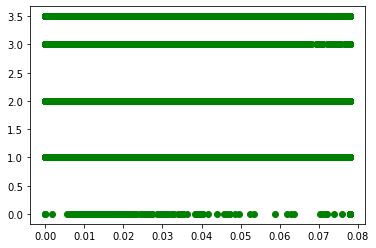

In [66]:
plt.scatter(df.Distance,df.amount,color="green")

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='amount'>

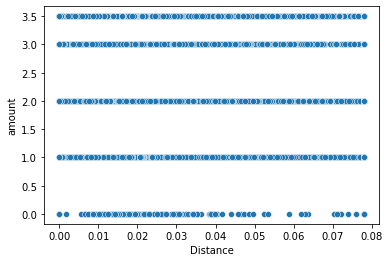

In [67]:
sns.scatterplot(df["Distance"],df["amount"])

(array([2134., 4107., 4637., 7302., 4823., 4535., 9053., 5624., 4356.,
        3419.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

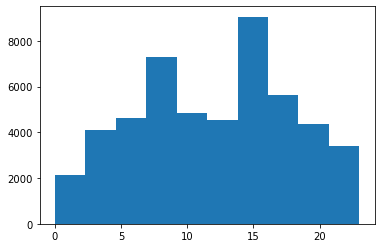

In [68]:
plt.hist(df["Hours"])

(array([4673., 4809., 5102., 5041., 5131., 5130., 5038., 4981., 4664.,
        5421.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

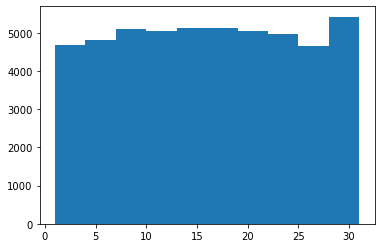

In [69]:
plt.hist(df["Day"])

In [70]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.16,random_state=2)

In [72]:
reg=LinearRegression()

In [73]:
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
reg.score(x_train,y_train)

1.0

In [75]:
reg.score(x_test,y_test)

1.0

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
NNH=KNeighborsRegressor(n_neighbors=11)

In [78]:
NNH.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [79]:
NNH.score(x_train,y_train)

0.6130008673411648

In [80]:
NNH.score(x_test,y_test)

0.5081625576880916